In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.9.1
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.0
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [2]:
# 用karas里的数据集imdb，电影分类,分为积极的、消极的
imdb = keras.datasets.imdb
# 载入数据
vocab_size = 10000  # 词典大小，仅保留训练数据中前10000个最经常出现的单词，低频单词被舍弃
index_from = 3  # 0,1,2,3空出来做别的用处
# 前一万个词出现词频最高的会保留下来进行处理，后面的作为特殊字符处理
# 数据集中有说明，小于3的id都是特殊字符
# 需要注意的一点是取出来的词表还是从1开始的，需要做处理
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words = vocab_size, index_from = index_from)

In [3]:
type(train_data)

numpy.ndarray

In [4]:
train_data.shape

(25000,)

In [5]:
type(train_data[0])

list

In [6]:
len(train_data[0])

218

In [7]:
min([ j for  i  in train_data  for j in i ])  # 说明词的index是从1开始

1

In [8]:
# 标签分为两个类别，积极和消极
min(train_labels)

0

In [9]:
max(train_labels)

1

In [10]:
# train_data每个样本都是一个向量
# train_labels的每个样本都是一个值，0或者1
# label为pos(positive) 1和neg(negative) 0
print(train_data[0], train_labels[0])
print(type(train_data[0]))
print('-'*50)
# 两个形状,train_data.shape显示的只有一维，是因为另外一维是变长的
print(train_data.shape, train_labels.shape)
# 打印第一个、第二个样本长度，可以看出是变长的，变长我们要把它都变为一样的长度
print(len(train_data[0]), len(train_data[1]))
print(type(train_data))
print(type(train_labels))

print(np.unique(train_labels))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1
<class 'list'>
-------------------------------------------

In [11]:
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [12]:
print(test_data.shape, test_labels.shape)

(25000,) (25000,)


In [13]:
print(train_data.shape, train_labels.shape)

(25000,) (25000,)


In [14]:
# 载入词表，看下词表长度，词表就像英语字典
word_index = imdb.get_word_index()
print(len(word_index))
print(type(word_index))
# 词表虽然有8万多，但是我们只载入了最高频的1万词

88584
<class 'dict'>


In [15]:
for key, value in word_index.items():
    print(key,value)
    break

fawn 34701


In [16]:
dict([(1,'a'),(2,'b')])

{1: 'a', 2: 'b'}

In [17]:
# 为什么要翻过来，是因为原来的key，是单词，是一个字符串，而value是数值
reverse_word_index = dict(
    [(value, key) for key, value in word_index.items()])
print(type(reverse_word_index))
reverse_word_index.get(4)

<class 'dict'>


'of'

In [18]:
# 需要注意的一点是取出来的词表还是从1开始的，需要做处理，偏移3,是因为index_from的缘故
word_index = {k:(v+3) for k, v in word_index.items()}

In [19]:
word_index['of']

7

In [20]:
# 小于3的id都是特殊字符，下面的代码中给这些id的意义做了明确，因为我们做了偏移，因此对于这些多余槽位我们给与新的释义
word_index['<PAD>'] = 0   # 做padding时，我们来填充的字符
word_index['<START>'] = 1  # 起始
word_index['<UNK>'] = 2  # 找不到就返回UNK，排名到1万名以后的词，标记为UNK
word_index['<END>'] = 3  # 每个句子末尾

# 做了偏移3的处理后再翻转
reverse_word_index = dict(
    [(value, key) for key, value in word_index.items()])


def decode_review(text_ids):
    return ' '.join(
        [reverse_word_index.get(word_id, "<UNK>") for word_id in text_ids])
# 有了reverse我们可以反向转回来看看这句话是什么，就是把数字解释为了真实的文本
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [21]:
# 长度低于500会被补全，高于500会被截断
max_length = 500

# pad_sequences用来做padding
train_data = keras.preprocessing.sequence.pad_sequences(
    train_data,  # list of list
    value = word_index['<PAD>'],  # 填充啥内容
    padding = 'post',  # pre，post: padding的顺序，一个是零放前面，一个是后面
    maxlen = max_length)  # 长度低于500会被补全，高于500会被截断

# 对应test一样的
test_data = keras.preprocessing.sequence.pad_sequences(
    test_data,  # list of list
    value = word_index['<PAD>'],
    padding = 'post',  # post, pre
    maxlen = max_length)

print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [22]:
type(train_data[0])

numpy.ndarray

In [23]:
print(train_data.shape)

(25000, 500)


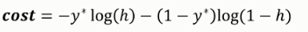

In [24]:
# 上图是交叉熵损失的公式
y_true = [[0,1]]
y_pred = [[0.6,0.3]]
loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
# assert loss.shape == (2,)
loss.numpy()

array([1.0601315], dtype=float32)

In [25]:
(-1*np.log(0.4)-1*np.log(0.3))/2

1.0601317681000455

In [26]:
embedding_dim = 16
batch_size = 128
model = keras.models.Sequential([
    # 1. define matrix: [vocab_size, embedding_dim]
    # 2. [1,2,3,4..], max_length * embedding_dim
    # 3. batch_size * max_length * embedding_dim  最后变为
    keras.layers.Embedding(vocab_size,  # vocab_size为词袋大小
                           embedding_dim,  # embedding_dim，每个词的密度向量维度是16
                           input_length = max_length),
    # GlobalAveragePooling1D是把batch_size * max_length * embedding_dim 
    #   -> batch_size * embedding_dim，消除维度max_length
    keras.layers.GlobalAveragePooling1D(),  # 全剧平均值池化，抽象上让一个词表示整篇文章
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy'])
# 160000 是vocab_size*embedding_dim的结果
# 1088 是embedding_dim*64+64得到的结果  wx+b
# 65是 w*1+1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 161,153
Trainable params: 161,153
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.utils import plot_model

plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [28]:
model.variables

[<tf.Variable 'embedding/embeddings:0' shape=(10000, 16) dtype=float32, numpy=
 array([[ 0.01109232, -0.01282833,  0.02683771, ...,  0.02851734,
          0.02263183,  0.01505737],
        [ 0.0287188 ,  0.02306494,  0.01900971, ...,  0.00927439,
         -0.04658753, -0.02292444],
        [ 0.03207815, -0.01268139, -0.01565129, ...,  0.04250921,
          0.02595207,  0.03190101],
        ...,
        [ 0.00173556,  0.03048125, -0.03157035, ..., -0.00594581,
         -0.03788459,  0.01076487],
        [-0.02796408,  0.0061504 ,  0.02227152, ..., -0.0321392 ,
         -0.0201616 ,  0.00707381],
        [ 0.01370862,  0.03239581, -0.04347644, ..., -0.03397691,
          0.01861546,  0.00089153]], dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(16, 64) dtype=float32, numpy=
 array([[-0.2045945 , -0.08192645, -0.00072876, ..., -0.19702977,
         -0.05810434, -0.22142392],
        [ 0.12319973,  0.25983232,  0.19021338, ..., -0.10598585,
          0.01096293, -0.2164565 ],
      

In [29]:
# validation_split可以将训练集按比例分为训练集和验证集
history = model.fit(train_data, train_labels,
                    epochs = 30,
                    batch_size = batch_size,
                    validation_split = 0.2)

Epoch 1/30
157/157 [==============================] - 2s 7ms/step - loss: 0.6831 - accuracy: 0.5885 - val_loss: 0.6474 - val_accuracy: 0.7046
Epoch 2/30
157/157 [==============================] - 1s 7ms/step - loss: 0.5446 - accuracy: 0.8033 - val_loss: 0.4401 - val_accuracy: 0.8492
Epoch 3/30
157/157 [==============================] - 1s 6ms/step - loss: 0.3626 - accuracy: 0.8727 - val_loss: 0.3400 - val_accuracy: 0.8726
Epoch 4/30
157/157 [==============================] - 1s 6ms/step - loss: 0.2820 - accuracy: 0.8990 - val_loss: 0.3084 - val_accuracy: 0.8828
Epoch 5/30
157/157 [==============================] - 1s 7ms/step - loss: 0.2395 - accuracy: 0.9132 - val_loss: 0.2903 - val_accuracy: 0.8878
Epoch 6/30
157/157 [==============================] - 1s 7ms/step - loss: 0.2115 - accuracy: 0.9239 - val_loss: 0.2826 - val_accuracy: 0.8922
Epoch 7/30
157/157 [==============================] - 1s 6ms/step - loss: 0.1889 - accuracy: 0.9322 - val_loss: 0.2794 - val_accuracy: 0.8942
Epoch 

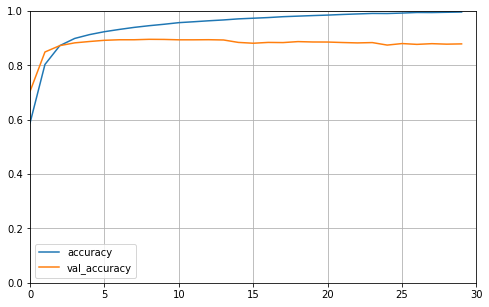

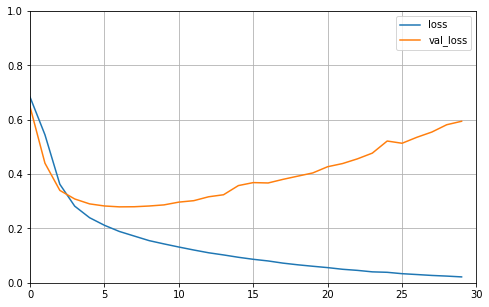

In [30]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()
    
plot_learning_curves(history, 'accuracy', 30, 0, 1)
plot_learning_curves(history, 'loss', 30, 0, 1)
# 可以看出loss发生了过拟合

In [31]:
model.evaluate(
    test_data, test_labels,
    batch_size = batch_size,
    verbose = 0)

[0.63817298412323, 0.8600000143051147]